In [1]:
!pip install pymysql
!pip install sqlalchemy

In [2]:
import pandas as pd
import numpy as np

import pymysql                        # for getting data from a SQL database
from sqlalchemy import create_engine  # for establishing the connection and authentication

from getpass import getpass  # To get the password without showing the input

In [3]:
password = getpass()

········


In [26]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila' # localhost= 127.000.001
engine = create_engine(connection_string)
query = '''SELECT DISTINCT f.title, rental_duration,rating, rental_rate, length,replacement_cost,
SUM(
       CASE 
         WHEN r.rental_date BETWEEN '2005-05-01' AND '2005-05-31' THEN 1 
         ELSE 0 
       END) AS rented_in_may 
FROM   film f
LEFT JOIN inventory i
USING (film_id)
LEFT JOIN rental r
ON i.inventory_id = r.inventory_id
GROUP BY f.film_id;'''

data = pd.read_sql_query(query, engine)
data.head(10)

,title,rental_duration,rating,rental_rate,length,replacement_cost,rented_in_may
0,ACADEMY DINOSAUR,6,PG,0.99,86,20.99,2.0
1,ACE GOLDFINGER,3,G,4.99,48,12.99,0.0
2,ADAPTATION HOLES,7,NC-17,2.99,50,18.99,0.0
3,AFFAIR PREJUDICE,5,G,2.99,117,26.99,1.0
4,AFRICAN EGG,6,G,2.99,130,22.99,1.0
5,AGENT TRUMAN,3,PG,2.99,169,17.99,2.0
6,AIRPLANE SIERRA,6,PG-13,4.99,62,28.99,0.0
7,AIRPORT POLLOCK,6,R,4.99,54,15.99,2.0
8,ALABAMA DEVIL,3,PG-13,2.99,114,21.99,0.0
9,ALADDIN CALENDAR,6,NC-17,4.99,63,24.99,0.0


# Converting values for (rented_in_may) to Boolean using functions

In [27]:
def appendboolean(x):

    if x == 0:
        return 'False'
    else:
        return "True"

data['rented_in_may'] = list(map(appendboolean, data['rented_in_may']))
data.head()

,title,rental_duration,rating,rental_rate,length,replacement_cost,rented_in_may
0,ACADEMY DINOSAUR,6,PG,0.99,86,20.99,True
1,ACE GOLDFINGER,3,G,4.99,48,12.99,False
2,ADAPTATION HOLES,7,NC-17,2.99,50,18.99,False
3,AFFAIR PREJUDICE,5,G,2.99,117,26.99,True
4,AFRICAN EGG,6,G,2.99,130,22.99,True


In [28]:
data.isna().sum()

title               0
rental_duration     0
rating              0
rental_rate         0
length              0
replacement_cost    0
rented_in_may       0
dtype: int64

In [29]:
data.dtypes

title                object
rental_duration       int64
rating               object
rental_rate         float64
length                int64
replacement_cost    float64
rented_in_may        object
dtype: object

In [30]:
data['rental_duration'].value_counts() # should be convert to categorical

6    212
3    203
4    203
7    191
5    191
Name: rental_duration, dtype: int64

In [31]:
#Funtein to clean rented in May
# both '' and ' ' seem to indicate unknown values, I will group them together

data.head()

,title,rental_duration,rating,rental_rate,length,replacement_cost,rented_in_may
0,ACADEMY DINOSAUR,6,PG,0.99,86,20.99,True
1,ACE GOLDFINGER,3,G,4.99,48,12.99,False
2,ADAPTATION HOLES,7,NC-17,2.99,50,18.99,False
3,AFFAIR PREJUDICE,5,G,2.99,117,26.99,True
4,AFRICAN EGG,6,G,2.99,130,22.99,True


In [32]:
# converting
data['rental_duration'] = data['rental_duration'].astype('object') # This will be treated as categorical
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rental_rate,1000.0,2.980,1.646393,0.99,0.99,2.99,4.99,4.99
length,1000.0,115.272,40.426332,46.00,80.00,114.00,149.25,185.00
replacement_cost,1000.0,19.984,6.050833,9.99,14.99,19.99,24.99,29.99


In [33]:
## checking all the categorical columns
data['rating'].value_counts()

PG-13    223
NC-17    210
R        195
PG       194
G        178
Name: rating, dtype: int64

In [34]:
data['title'].value_counts()

ACADEMY DINOSAUR    1
PERFECT GROOVE      1
PARK CITIZEN        1
PARTY KNOCK         1
PAST SUICIDES       1
                   ..
FROGMEN BREAKING    1
FRONTIER CABIN      1
FROST HEAD          1
FUGITIVE MAGUIRE    1
ZORRO ARK           1
Name: title, Length: 1000, dtype: int64

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns    # to check for correlation of numerical values
%matplotlib inline

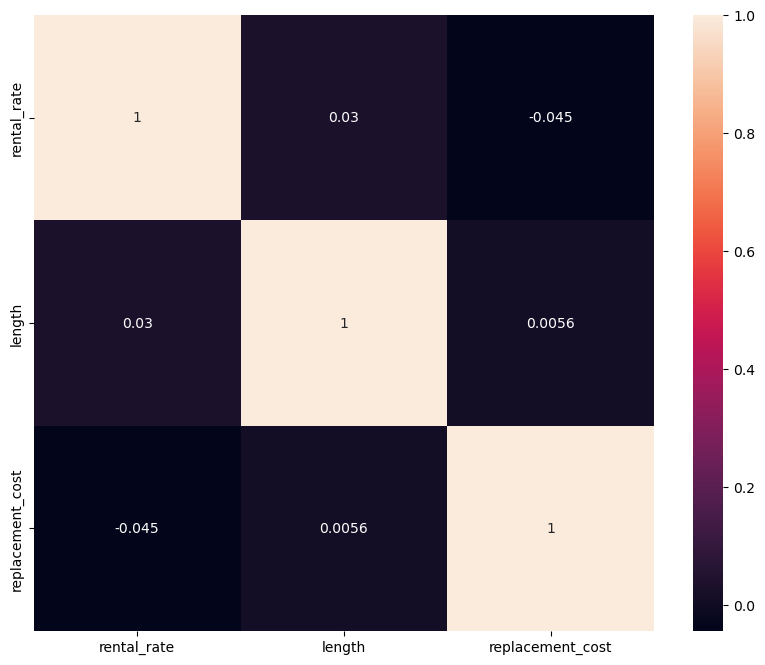

In [36]:
# Checking for multicollinearity

corr_matrix=data.corr()  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

# Splitting x and Y

In [37]:
 #Build X and y
y = data['rented_in_may']
X = data.drop(['rented_in_may'], axis=1)

In [38]:
X = X.drop(['title'], axis=1) #since it contains unique values

In [39]:
y

0       True
1      False
2      False
3       True
4       True
       ...  
995    False
996    False
997     True
998     True
999     True
Name: rented_in_may, Length: 1000, dtype: object

In [40]:
X

,rental_duration,rating,rental_rate,length,replacement_cost
0,6,PG,0.99,86,20.99
1,3,G,4.99,48,12.99
2,7,NC-17,2.99,50,18.99
3,5,G,2.99,117,26.99
4,6,G,2.99,130,22.99
...,...,...,...,...,...
995,6,G,0.99,183,9.99
996,4,NC-17,0.99,179,14.99
997,6,NC-17,0.99,105,10.99
998,5,R,2.99,101,28.99


In [41]:
X

,rental_duration,rating,rental_rate,length,replacement_cost
0,6,PG,0.99,86,20.99
1,3,G,4.99,48,12.99
2,7,NC-17,2.99,50,18.99
3,5,G,2.99,117,26.99
4,6,G,2.99,130,22.99
...,...,...,...,...,...
995,6,G,0.99,183,9.99
996,4,NC-17,0.99,179,14.99
997,6,NC-17,0.99,105,10.99
998,5,R,2.99,101,28.99


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [43]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [44]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,rental_rate,length,replacement_cost
0,1.0,0.769784,0.70
1,0.0,0.151079,0.65
2,0.5,0.258993,1.00
3,1.0,0.223022,0.70
4,0.0,0.733813,0.65


In [45]:
X_train_categorical = X_train.select_dtypes(include = np.object)
X_train_cat = pd.get_dummies(X_train_categorical, 
                             columns=["rental_duration", "rating"],
                             drop_first=True)
X_train_cat.head()

C:\Users\ansah\AppData\Local\Temp\ipykernel_15516\3300329594.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_categorical = X_train.select_dtypes(include = np.object)
C:\Users\ansah\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,rental_duration_4,rental_duration_5,rental_duration_6,rental_duration_7,rating_NC-17,rating_PG,rating_PG-13,rating_R
46,0,1,0,0,1,0,0,0
789,0,0,1,0,0,0,1,0
722,0,0,0,0,0,0,1,0
283,0,1,0,0,1,0,0,0
39,1,0,0,0,0,0,0,1


In [47]:
# build X_train and y_train
# remember: y = data['rented_in_may'], y_train selected in train_test_split
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)

In [48]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [ ]:
# NO - need to perform transformations on the X_test as well
# Can we now make predictions on the X_test?
# predictions = classification.predict(X_test)
# classification.score(X_test, y_test)


In [49]:
# for numericals
X_test_num = X_test.select_dtypes(include = np.number)

# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [50]:
# for categoricals
X_test_categorical = X_test.select_dtypes(include = np.object)
X_test_cat = pd.get_dummies(X_test_categorical, 
                            columns=["rental_duration", "rating"],
                            drop_first=True)
# verify that dummies columns are in the same order and that the same column was dropped
display(list(zip(list(X_train_cat.columns),list(X_test_cat.columns))))
# not needed if you treat each dataframe with one_hot_encoder and save the encode (and the column names)

X_test_cat.head()

C:\Users\ansah\AppData\Local\Temp\ipykernel_15516\732020856.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_categorical = X_test.select_dtypes(include = np.object)
C:\Users\ansah\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


[('rental_duration_4', 'rental_duration_4'),
 ('rental_duration_5', 'rental_duration_5'),
 ('rental_duration_6', 'rental_duration_6'),
 ('rental_duration_7', 'rental_duration_7'),
 ('rating_NC-17', 'rating_NC-17'),
 ('rating_PG', 'rating_PG'),
 ('rating_PG-13', 'rating_PG-13'),
 ('rating_R', 'rating_R')]

,rental_duration_4,rental_duration_5,rental_duration_6,rental_duration_7,rating_NC-17,rating_PG,rating_PG-13,rating_R
977,0,0,0,0,0,0,0,1
15,0,0,1,0,1,0,0,0
56,1,0,0,0,0,0,1,0
801,0,0,0,1,0,1,0,0
747,1,0,0,0,0,0,1,0


In [51]:
#Concating X numericals and categoricals
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

# test prediction 

In [52]:
from sklearn.linear_model import LogisticRegression
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test) # the test prediction uses the the results of the (X_test_transformed) and compayes
#with tha actual y test. you dont fit the model

0.59

In [54]:
print(y_test.value_counts())
# A lot of people rented movie in May 2005

True     126
False     74
Name: rented_in_may, dtype: int64


In [55]:
pd.Series(predictions).value_counts()
# This shows that the model predicted greater desparity than in y

True     184
False     16
dtype: int64

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  4,  70],
       [ 12, 114]], dtype=int64)